In [40]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [41]:
# Dùng thư viện yfinance để tải dataset 
import yfinance as yf

start_date = '2019-01-01'
end_date = '2023-03-31'
symbol = 'ETH-USD' 

data = yf.download(symbol, start=start_date, end=end_date)
data.to_csv('/content/drive/MyDrive/Datasets/ETH-USD.csv')

[*********************100%***********************]  1 of 1 completed


In [42]:
# Xem data 
data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-01-01,0.002346,0.002392,0.002322,0.002392,0.002392,17364744
2019-01-02,0.002388,0.002458,0.002372,0.002407,0.002407,18015392
2019-01-03,0.002404,0.002414,0.002356,0.002360,0.002360,17619234
2019-01-04,0.002364,0.002397,0.002274,0.002315,0.002315,19530100
2019-01-05,0.002320,0.002350,0.002280,0.002319,0.002319,17148586
...,...,...,...,...,...,...
2023-03-26,0.074055,0.075376,0.073721,0.074417,0.074417,228916506
2023-03-27,0.074426,0.075831,0.071756,0.072895,0.072895,435284210
2023-03-28,0.072899,0.073925,0.071937,0.073823,0.073823,276514415


In [43]:
# 1. Các thư viện cần thiết
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression


In [44]:
# 2. Đọc file dữ liệu chứng khoán AAPL và chia train test validate theo tỉ lệ 7:1:2
df = pd.read_csv('/content/drive/MyDrive/Datasets/ETH-USD.csv')
df = df[['Close']]
df = df.dropna() # Drop missing values
df = df.reset_index(drop=True) # Reset the index

# Split the data into training, testing, and validation sets - 6-3-1
train_size = int(0.6 * len(df))
test_size = int(0.3 * len(df))
val_size = len(df) - train_size - test_size

train_data = df[:train_size]
test_data = df[train_size:train_size+test_size]
val_data = df[train_size+test_size:]

In [45]:
# 3. Quá trình Training
x_train = np.array(train_data.index).reshape(-1, 1)
y_train = np.array(train_data['Close'])

# Train the linear regression model
model = LinearRegression()
model.fit(x_train, y_train)


LinearRegression()

In [46]:
# 4. Quá trình testing 
x_test = np.array(test_data.index).reshape(-1, 1)
y_test = np.array(test_data['Close'])
y_pred = model.predict(x_test)

# 5. Quá trình Validate
x_val= np.array(val_data.index).reshape(-1, 1)
y_val = np.array(val_data['Close'])
y_pred_val =  model.predict(x_val)

In [47]:
# 6. Quá trình tạo index predict 30 ngày tiếp theo
last_index =  df.index[-1]
last_data = pd.RangeIndex(start=last_index, stop=last_index+30, step=1)

# Create an array of 30 consecutive integers starting from last_index
x_next_30_days = np.array(range(last_index+1, last_index+31)).reshape(-1, 1)

# Predict the closing prices for the next 30 days
y_next_30_days = model.predict(x_next_30_days)

# Print the predicted closing prices for the next 30 days
print('Predicted closing prices for the next 30 days:')
print(y_next_30_days)

Predicted closing prices for the next 30 days:
[0.27221319 0.27242641 0.27263963 0.27285285 0.27306606 0.27327928
 0.2734925  0.27370572 0.27391894 0.27413216 0.27434538 0.2745586
 0.27477181 0.27498503 0.27519825 0.27541147 0.27562469 0.27583791
 0.27605113 0.27626434 0.27647756 0.27669078 0.276904   0.27711722
 0.27733044 0.27754366 0.27775687 0.27797009 0.27818331 0.27839653]


In [48]:
# 7. Đánh giá độ chính xác validate, test
valid_rmse = np.sqrt(np.mean((y_pred_val - y_val)**2))
test_rmse = np.sqrt(np.mean((y_pred - y_test)**2))
print('Validation RMSE:', valid_rmse)
print('Testing RMSE:', test_rmse)


Validation RMSE: 0.17169551680105377
Testing RMSE: 0.11079229422350687


Validation RMSE: 0.17169551680105377
Testing RMSE: 0.11079229422350687


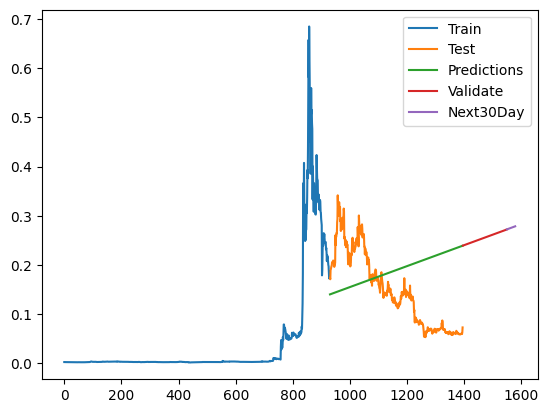

In [49]:
# 8. Tính RMSE
valid_rmse = np.sqrt(np.mean((y_pred_val - y_val)**2))
test_rmse = np.sqrt(np.mean((y_pred - y_test)**2))
print('Validation RMSE:', valid_rmse)
print('Testing RMSE:', test_rmse)

# 9.Vẽ hình
plt.plot(train_data.index, train_data['Close'])
plt.plot(test_data.index, test_data['Close'])
plt.plot(test_data.index, y_pred)
plt.plot(val_data.index, y_pred_val)
plt.plot(last_data,y_next_30_days)
plt.legend(['Train', 'Test', 'Predictions','Validate','Next30Day'])
plt.show()

In [50]:
test_data.index

RangeIndex(start=930, stop=1395, step=1)

In [51]:
# import sklearn.metrics as metrics
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_percentage_error
# mae = mean_absolute_error(y_test,y_pred)
# print('MAE:', mae) 
# mse = mean_squared_error(y_test,y_pred)
# print('MSE:', mse)
r_squared = r2_score(y_test, y_pred)
print("Test_R-squared: ", r_squared) 
r_squared = r2_score(y_val, y_pred_val)
print("Val_R-squared: ", r_squared) 
test_mape = mean_absolute_percentage_error(y_test, y_pred)
print("Testing MAPE",test_mape)
val_mape = mean_absolute_percentage_error(y_val, y_pred_val)
print("Validation MAPE",val_mape)

Test_R-squared:  -1.1599163701387045
Val_R-squared:  -161.67937006371025
Testing MAPE 1.051254673977472
Validation MAPE 2.0759626991949465
